In [41]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [42]:
NUM_CLASSES = 18

IMAGE_SIZE = 120

DATASET_PATH = "data/images/pokemon_per_type"

In [43]:
# Creating the model
model=Sequential()
model.add(Convolution2D(32,(5,5),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),input_shape=(58,58,32),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3000,activation='relu'))
model.add(Dense(units=NUM_CLASSES,activation='softmax'))

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 116, 116, 32)      2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 50176)             0         
                                                                 
 dense_12 (Dense)            (None, 3000)             

In [45]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])


In [46]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   rotation_range = 20,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(DATASET_PATH + '/train', 
                                                    target_size = (IMAGE_SIZE, IMAGE_SIZE), 
                                                    batch_size = 16)
test_set = test_datagen.flow_from_directory(DATASET_PATH + '/val',
                                                target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = 16)

Found 984 images belonging to 18 classes.
Found 230 images belonging to 18 classes.


In [47]:
fitted_model = model.fit(training_set,
                        steps_per_epoch = 10,
                        epochs = 100,
                        validation_data = test_set,
                        shuffle = 0,
                        validation_steps = 2)

Epoch 1/100
10/10 [==============================] - 129s 12s/step - loss: 15.1214 - accuracy: 0.0625 - val_loss: 2.9025 - val_accuracy: 0.1562
Epoch 2/100
10/10 [==============================] - 19s 2s/step - loss: 2.9591 - accuracy: 0.0812 - val_loss: 2.8942 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 17s 2s/step - loss: 2.8684 - accuracy: 0.0812 - val_loss: 2.8172 - val_accuracy: 0.0625
Epoch 4/100
10/10 [==============================] - 17s 2s/step - loss: 2.8501 - accuracy: 0.0812 - val_loss: 2.8864 - val_accuracy: 0.0312
Epoch 5/100
10/10 [==============================] - 17s 2s/step - loss: 2.8590 - accuracy: 0.1063 - val_loss: 2.8603 - val_accuracy: 0.0625
Epoch 6/100
10/10 [==============================] - 27s 3s/step - loss: 2.8746 - accuracy: 0.0812 - val_loss: 2.8782 - val_accuracy: 0.1250
Epoch 7/100
10/10 [==============================] - 18s 2s/step - loss: 2.8697 - accuracy: 0.0500 - val_loss: 2.8548 - val_accuracy: 0.0938
Epoch 

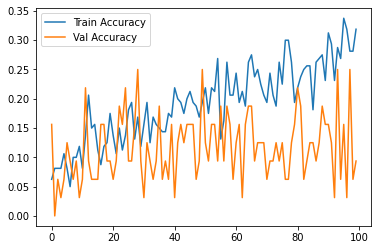

In [51]:
plt.figure()
plt.plot([i for i in range(100)],fitted_model.history['accuracy'], label = "Train Accuracy")
plt.plot([i for i in range(100)],fitted_model.history['val_accuracy'], label = "Val Accuracy")
plt.legend()

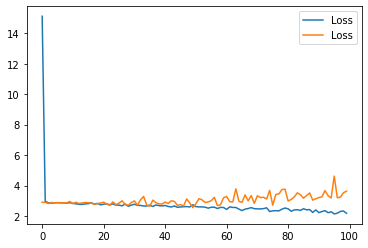

In [52]:
plt.figure()
plt.plot([i for i in range(100)],fitted_model.history['loss'], label = "Loss")
plt.plot([i for i in range(100)],fitted_model.history['val_loss'], label = "Loss")
plt.legend()

In [53]:
def pred(image_path):
    image = Image.open(image_path)
    image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
    x = np.array(image)
    x = np.expand_dims(x,axis=0)
    c = np.argmax(model.predict(x), axis=1)
    l = os.listdir(DATASET_PATH + '/train')
    l.sort()
    return l[c[0]]


pred(DATASET_PATH + '/train/Dragon/dialga.jpg')

'Dragon'